In [1]:
# Core Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Data Cleaning

## Loading Dataset

In [2]:
data = pd.read_csv("Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Removing and checking for duplicates

In [3]:
data.duplicated().sum() # Check for duplicates in the data

0

No duplicates in the data

In [4]:
data.drop(columns='customerID', inplace=True) # Drop the customerID as it is a unique identifier and does not have any meaning towards analysis as we already have index rows

## Identifying Data Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
data.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
data['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

## Removing Null Values

In [8]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True) # We can remove the null values in the dataset as the null in the TotalCharges col is only 11 out off 7044 rows, a small amount of number

data['TotalCharges'] = data['TotalCharges'].astype('float64')

data['SeniorCitizen'] = data['SeniorCitizen'].map({
    0:'No',
    1:'Yes'
}).astype(object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [10]:
data.describe(include=['float64','int64'])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
data.describe(include=['object'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


All the datatype has been properly put into its respective data tyes

There are some data in the data set that are wrongly put in to the catgory as "No phone service", and "No internet service" which is similar to "No". Thus, these values can be replaced with "No"

In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
        if 'No internet service' in data[col].unique() or 'No phone service' in data[col].unique():
            data[col] = data[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Exploratory Data Analysis

## Numerical Data


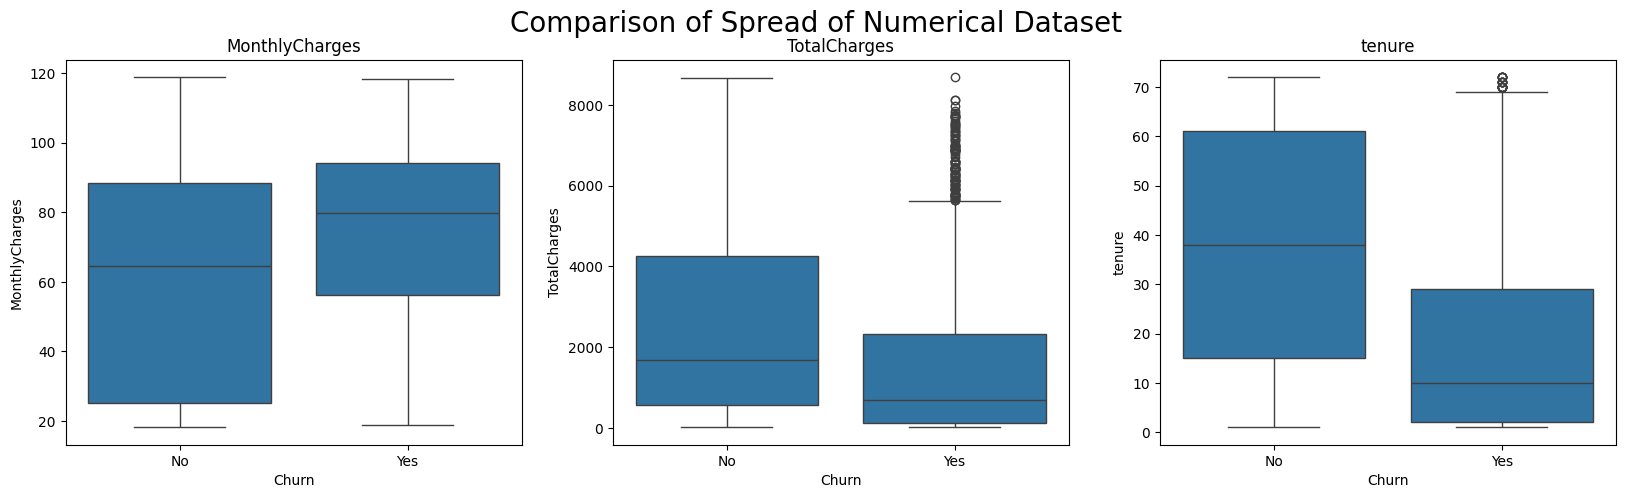

In [13]:
CatCols = data.select_dtypes(include=['object']).columns.tolist()
NumCols = data.select_dtypes(exclude=['object']).columns.tolist()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Create a title for the main figure
fig.suptitle('Comparison of Spread of Numerical Dataset', fontsize=20)

for i, col in enumerate(NumCols):
    z=i-1
    sns.boxplot(data=data, x='Churn', y=col, ax=axes[z])
    axes[z].set_title(col)

plt.show()

There are multiple ways to handle outliers. One of the methods is using the Interquartile Range (**IQR**). To decide on whether a data is an outlier, we can observe the equation:

$$Upper~Fence = Q_3+1.5(IQR)$$
$$Lower~Fence = Q_1-1.5(IQR)$$

Any values which are above the upper fence and below the lower fence, can be classified as outliers. These data points that are classified as outliers have to be relocated and identified on the dataset to see if the values are influential outliers, or if there is a mistake in the entry itself. Once the outliers have been identified, method on how to handle the outliers should be determined, either to remove or to edit the data itself due to errors.

However, in this dataset if these outliers are removed, it would introduce bias towards the the un-churned group as most outliers are represented in the churned gorup and will be unrepresented. Thus, the outliers are meaningful towards the interpretation of the data and will not be removed from the dataset.

C:\Users\user\AppData\Local\Temp\ipykernel_18896\2294415660.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == "No") ],
C:\Users\user\AppData\Local\Temp\ipykernel_18896\2294415660.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],


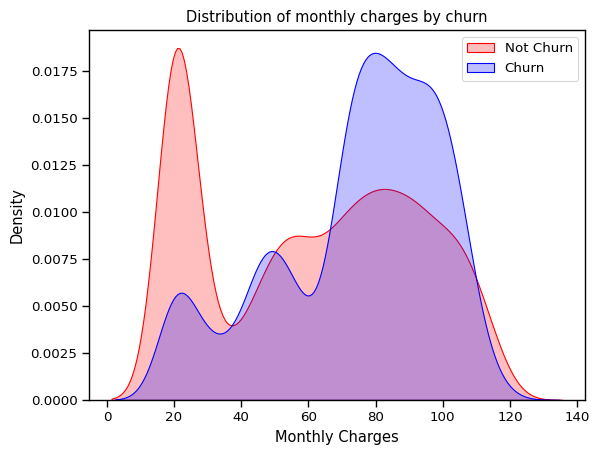

In [14]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == "No") ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn')
plt.show()


Customers with higher Monthly Charges are also more likely to churn

C:\Users\user\AppData\Local\Temp\ipykernel_18896\98750494.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
C:\Users\user\AppData\Local\Temp\ipykernel_18896\98750494.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],


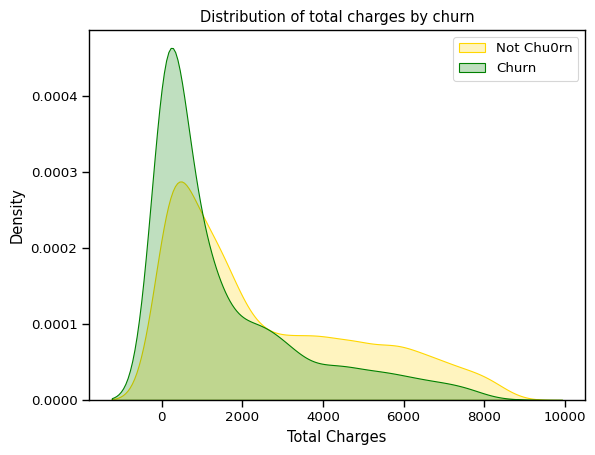

In [15]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn')
plt.show()

## Categorical Data

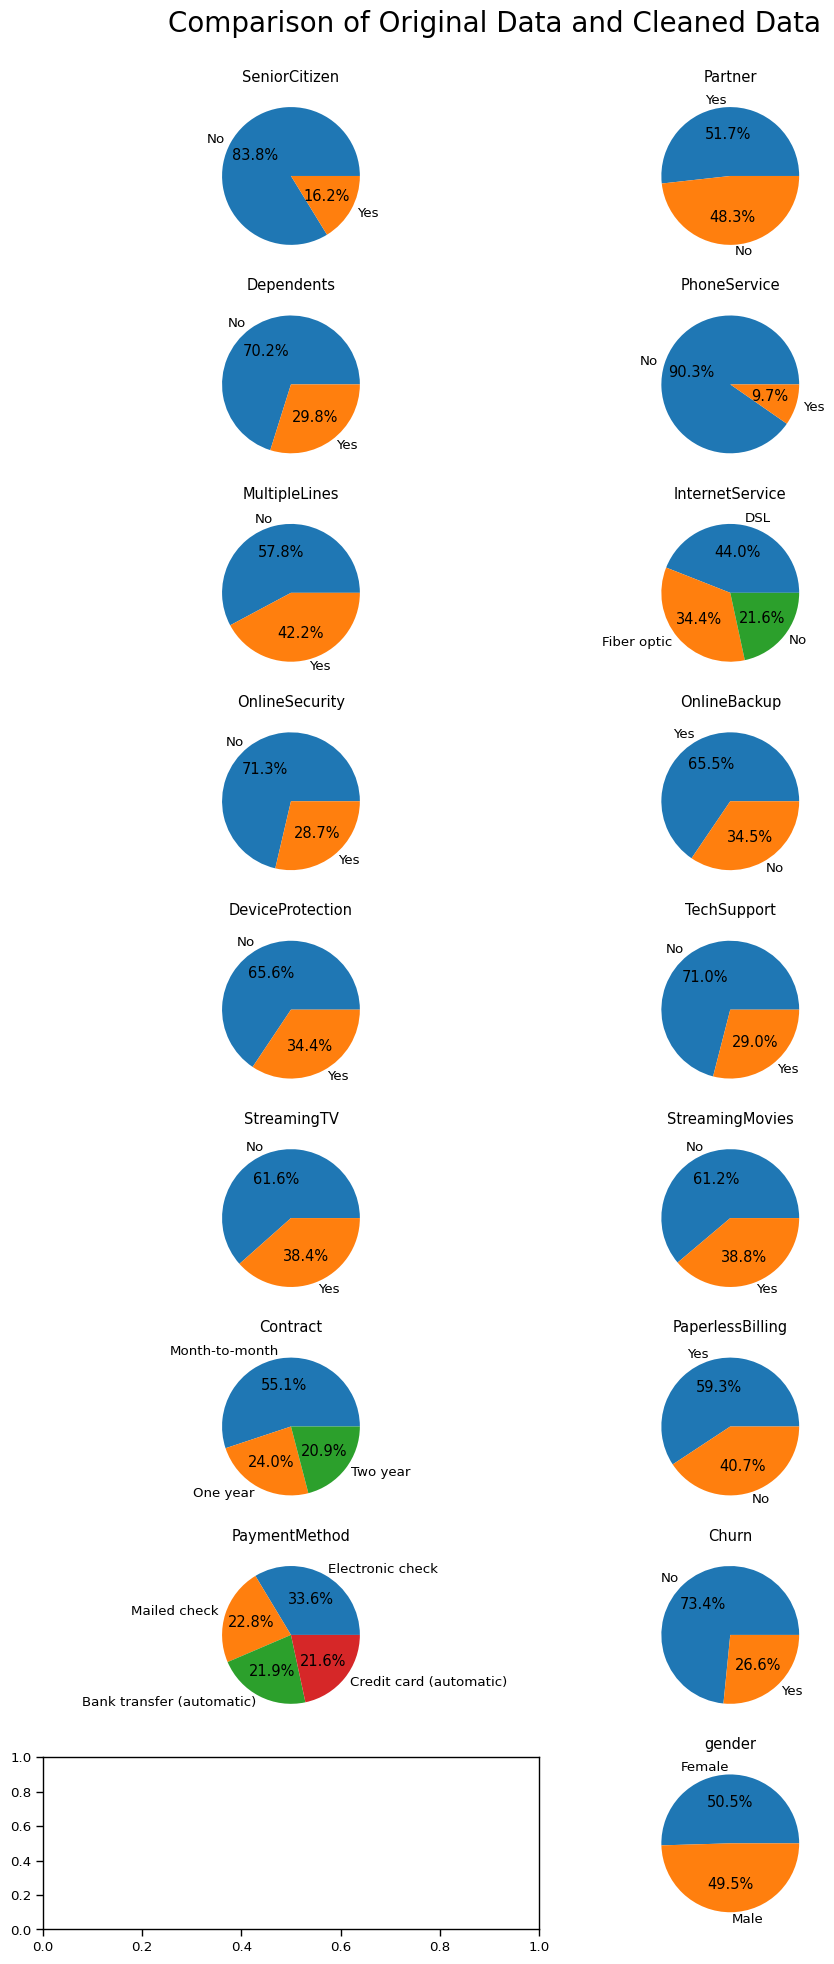

In [16]:
pies = CatCols

# Create a figure with subplots
fig, axes = plt.subplots(nrows=int(len(pies)/2)+1, ncols=2, figsize=(10, 20))

fig.suptitle('Comparison of Original Data and Cleaned Data', fontsize=20)

axes = axes.flatten()

# Define the rainbow color palette
colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# Create a for loop to produce each pie plot
for a, column in enumerate(pies):
    i=a-1
    # Plot data
    data_counts = data[column].value_counts()
    axes[i].pie(x=data[column].value_counts(), autopct='%1.1f%%', labels=data[column].dropna().unique())
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

From the pie plots of the categorical data, it can be seen that majority of the data is related to "No". The target variable of "Churn" also is imbalanced with only 1/4 of the data being in the Yes category. However, other data not related to the service provider such as demographic data and PaymentMethod are relatively more balanced.

## Categorical Data in relation to Customer Churn

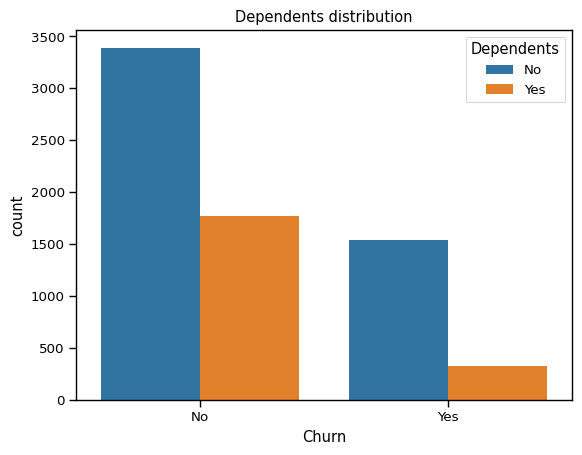

In [17]:
sns.countplot(data, x="Churn", hue="Dependents")
plt.title("Dependents distribution")
plt.show()

Customers without dependents are more likely to churn

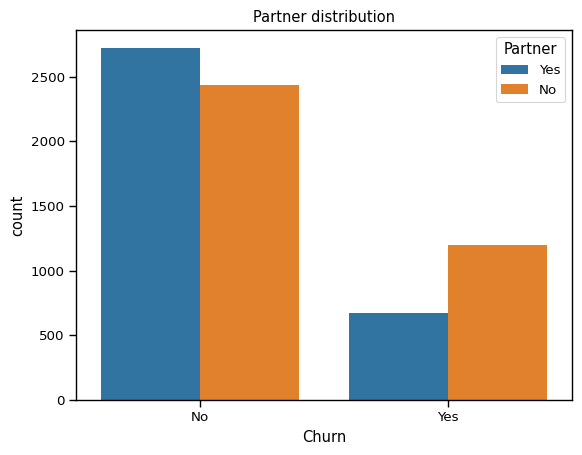

In [18]:
sns.countplot(data, x="Churn", hue="Partner")
plt.title("Partner distribution")
plt.show()

Customers that doesn't have partners are more likely to churn

# Data Preparation

In [13]:
pairs = NumCols + ['Churn']

sns.pairplot(data[pairs], hue='Churn')
plt.show()

NameError: name 'NumCols' is not defined

Some numerical features show linear relationship such as monthly charges and total charges. This would make sense as the TotalCharges is the sum of the MonthlyCharges which may introduce multicolinearity.

## Convert to numerical form

In [14]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [15]:
data = data.apply(lambda x: object_to_int(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [18]:
data.Contract.value_counts()

Contract
0    3875
2    1685
1    1472
Name: count, dtype: int64

In [22]:
X = data.drop(columns='Churn')
y = data['Churn']

# Data Preprocessing

## Train Test Split

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Scaling

In [24]:
scaler = StandardScaler()

X_train[NumCols] = scaler.fit_transform(X_train[NumCols])
X_test[NumCols] = scaler.transform(X_test[NumCols])

## Dimension Reducsion

In [25]:
pca = PCA()

data_pca = pca.fit_transform(X_train)

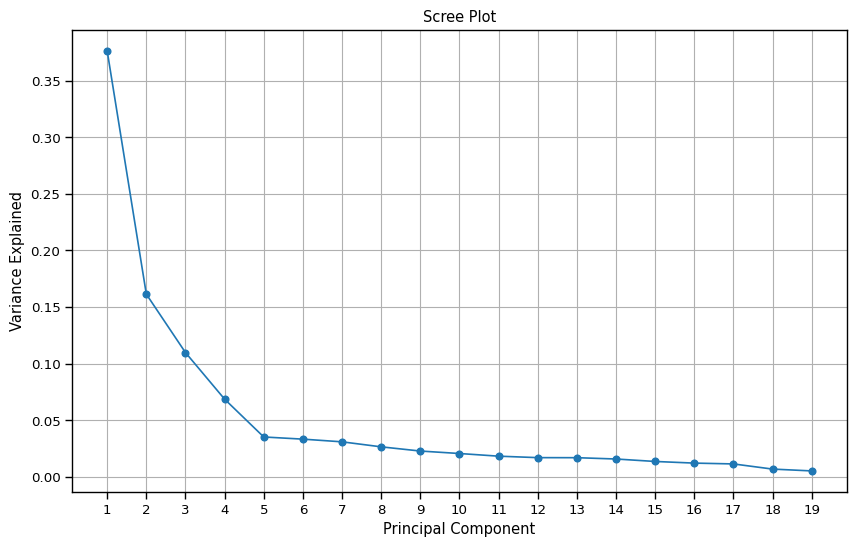

In [26]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid()
plt.show()

Elbow can be seen at the 5 principle components, thus the 5 components will be used for the model building

In [27]:
print(f"Total Variance for 5 Principle Components is : {np.cumsum(pca.explained_variance_ratio_)[5]*100:.2f}%")

Total Variance for 5 Principle Components is : 78.39%


In [28]:
# Reduce the number of components
pca_reduced = PCA(n_components=5)
X_train = pca_reduced.fit_transform(X_train)
X_test = pca_reduced.transform(X_test)

# Model Building

In [29]:
# Initialize df to store results
results_df = pd.DataFrame(columns=['Model Name','Model', 'Accuracy', 'Confusion Matrix', 'Classification Report', 'ROC AUC', 'Precision', 'Recall', 'F1-Score'])

# Create a function to evaluate models and store results in results_df
def evaluate_model(model, model_name=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Calculate ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None
    
    results_df.loc[len(results_df)] = [
        model_name,
        model,
        accuracy,
        conf_matrix,
        class_report,
        roc_auc,
        class_report['1']['precision'],
        class_report['1']['recall'],
        class_report['1']['f1-score']
    ]

## A. Random Forest

In [30]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = [{
    'max_depth' : [3,5,10],
    'min_samples_split' : [3,5,10]
}]

grid = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 5, 'min_samples_split': 3}


In [31]:
evaluate_model(RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=10), 'Random Forest')

## B. Support Vector Classifier

In [32]:
svc = SVC()
svc_param_grid = [{
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'kernel' : ['linear','rbf'],
    'gamma': [0.5, 1,2,3,4]
}]

grid = GridSearchCV(svc, svc_param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

grid.best_params_

{'C': 0.001, 'gamma': 0.5, 'kernel': 'linear'}

In [33]:
evaluate_model(SVC(random_state=42, C=100, gamma=0.5, kernel='linear', probability=True), 'Support Vector Classifier')

In [34]:
results_df

,Model Name,Model,Accuracy,Confusion Matrix,Classification Report,ROC AUC,Precision,Recall,F1-Score
0,Random Forest,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.788626,"[[1383, 166], [280, 281]]","{'0': {'precision': 0.8316295850871919, 'recal...",0.824886,0.628635,0.500891,0.557540
1,Support Vector Classifier,"SVC(C=100, gamma=0.5, kernel='linear', probabi...",0.783886,"[[1370, 179], [277, 284]]","{'0': {'precision': 0.8318154219793564, 'recal...",0.821830,0.613391,0.506239,0.554688


In [35]:
heatmap_data = results_df[['Model Name','Accuracy','ROC AUC','Precision','Recall','F1-Score']].set_index('Model Name')

heatmap_data

,Accuracy,ROC AUC,Precision,Recall,F1-Score
Model Name,,,,,
Random Forest,0.788626,0.824886,0.628635,0.500891,0.557540
Support Vector Classifier,0.783886,0.821830,0.613391,0.506239,0.554688


# Model Evaluation

## Confusion Matrix

In [36]:
print("Classification Report for Random Forest:")
results_df.iloc[0,4]

Classification Report for Random Forest:


{'0': {'precision': 0.8316295850871919,
  'recall': 0.8928340865074241,
  'f1-score': 0.861145703611457,
  'support': 1549.0},
 '1': {'precision': 0.6286353467561522,
  'recall': 0.5008912655971479,
  'f1-score': 0.5575396825396826,
  'support': 561.0},
 'accuracy': 0.7886255924170616,
 'macro avg': {'precision': 0.730132465921672,
  'recall': 0.696862676052286,
  'f1-score': 0.7093426930755697,
  'support': 2110.0},
 'weighted avg': {'precision': 0.7776581311991762,
  'recall': 0.7886255924170616,
  'f1-score': 0.7804239131748384,
  'support': 2110.0}}

Confusion Matrix for Random Forest:


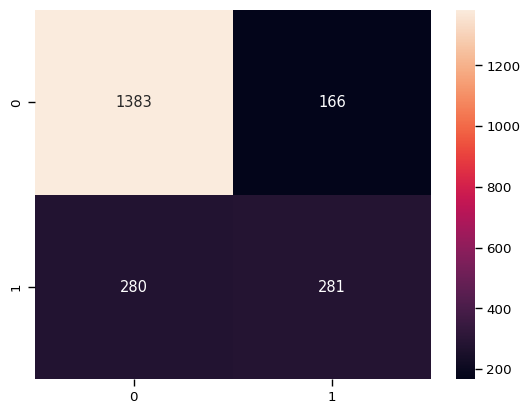

In [37]:
print("Confusion Matrix for Random Forest:")
sns.heatmap(results_df.iloc[0,3], annot=True, fmt="d")
plt.show()

In [38]:
print("Classification Report for SVC:")
results_df.iloc[1,4]

Classification Report for SVC:


{'0': {'precision': 0.8318154219793564,
  'recall': 0.8844415752098128,
  'f1-score': 0.8573216520650814,
  'support': 1549.0},
 '1': {'precision': 0.6133909287257019,
  'recall': 0.5062388591800356,
  'f1-score': 0.5546875,
  'support': 561.0},
 'accuracy': 0.7838862559241706,
 'macro avg': {'precision': 0.7226031753525292,
  'recall': 0.6953402171949242,
  'f1-score': 0.7060045760325406,
  'support': 2110.0},
 'weighted avg': {'precision': 0.7737414216403515,
  'recall': 0.7838862559241706,
  'f1-score': 0.7768582590278725,
  'support': 2110.0}}

Confusion Matrix for Random Forest:


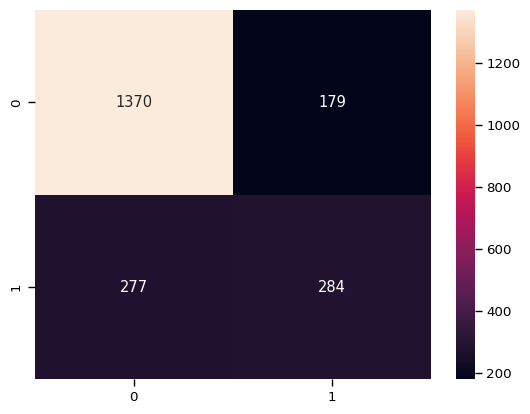

In [39]:
print("Confusion Matrix for Random Forest:")
sns.heatmap(results_df.iloc[1,3], annot=True, fmt="d")
plt.show()

## Performance Heatmap

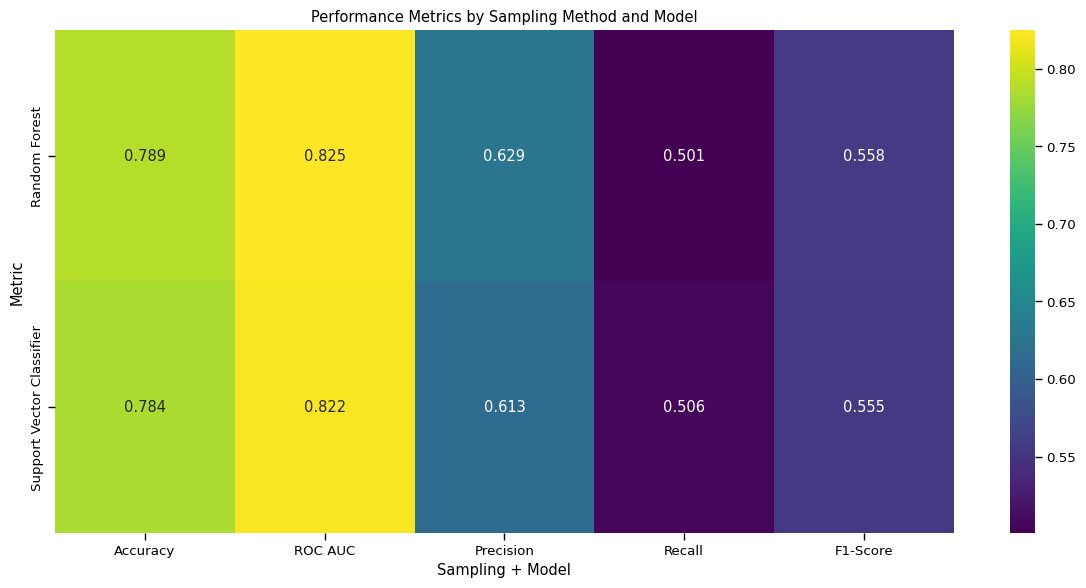

In [40]:
# Plot model performance
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis")
plt.title("Performance Metrics by Sampling Method and Model")
plt.ylabel("Metric")
plt.xlabel("Sampling + Model")
plt.tight_layout()
plt.show()

From the performance heatmap, it can be seen that RFC outperforms SVC. It outperforms the SVC in all metrics. However, both models are unable to learn from the Churned class (Yes) due to class imbalance. This causes an underrepresentation on the minority class causing an inflated precision but poor recall for all models. However in general both models struggle to learn from minority class. Addressing this imbalance should help with improving the score for the minority class.

## ROC Plot

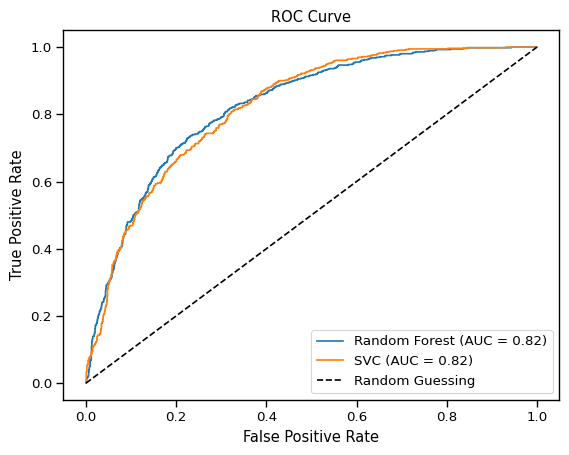

In [41]:
# plot ROC Curve for multiple models
def plot_roc_curve(model, label=None):
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    
# Plot ROC Curve for Random Forest
plot_roc_curve(results_df.iloc[0,1], label='Random Forest')

# Plot ROC Curve for SVC
plot_roc_curve(results_df.iloc[1,1], label='SVC')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Both models achieve fairly similarly good AUC score of 0.81 with RFC performing only slightly better. 

# Discussion, Limitaions, Improvements.

This project involves using two classification algorithm which are Random Forest Classifier and Support Vector Classifier. It can be shown that using these 2 models, RFC is able to achieve a slightly better performance. However, during the preprocessing, PCA was performed for dimension reduction. This is to reduce multicollinearity in the variables, but this comes with the cost of model interpretations. Models that excel in interpretability such as random forest which can extract the feature importance and is very much intuitive compared to SVC when involved in higher dimension dataset. When PCA is introduced into the pipeline, the interprebility of the features becomes an issue due to the tranformation of the dataset to its principle components.

If interpretation of features involvement towards the prediction is important, other dimension reduction methods should be considered such as Factor Analysis, or filtering subset selection using domain knowledge. By manually isolating subsets of the models, the true nature of the features can be used in the models, and relationship of features towards the prediction could be isolated using methods such as random forest feature importance, LIME, or SHAP evaluations.

Overall better performance can be achieved by:
1. Addressing the class imbalance
2. Increasing number of Principle Components of the model